# Facedetection for Escape Game

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image1='/Users/stijnvanhulle/GitHub/EscapePlan/python/test_data/schilderij_1.jpg'
image2='/Users/stijnvanhulle/GitHub/EscapePlan/python/test_data/schilderij_1_small.jpg'

sift= cv2.xfeatures2d.SIFT_create()
surf= cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create()

In [2]:
img1 = cv2.imread(image1,0)        # queryImage
img2 = cv2.imread(image2,0) 		# trainImage

In [7]:

def readPercent(matches):
    good = []
    for m,n in matches:
        if m.distance < 0.25*n.distance:
            good.append([m])

    amount=len(good)      
    percent=amount/len(matches)
    return percent *100

def getGood(matches):
    good = []
    for m,n in matches:
        if m.distance < 0.25*n.distance:
            good.append([m])
    return good


## Trainen aan de hand van orb

In [8]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good=getGood(matches)
print('ORB:', readPercent(matches))


ORB: 0.8


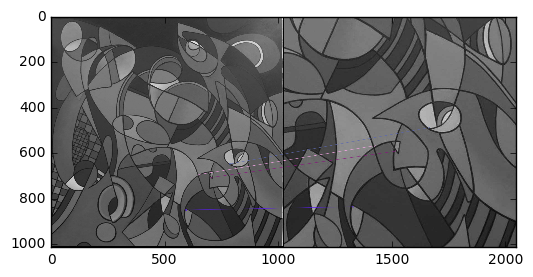

In [9]:
img_plt = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img_plt)
plt.show()

## Trainen aan de hand van SIFT

In [10]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)


good=getGood(matches)
print('SIFT:', readPercent(matches))

SIFT: 4.872321690636924


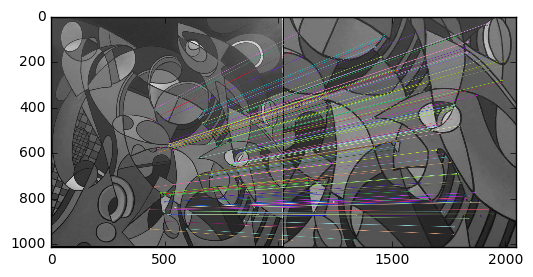

In [11]:
img_plt = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img_plt)
plt.show()

#### Hierboven kan je zien dat het percentage waarmee de 2 afbeeldingen overeenkomen 100% bedraagt en dit zal daarom over dezelfde afbeelding gaan. We hebben sift gebruikt omdat we daarom de beste gelijkenissen konden vinden,